# 2: Use Image Classification on the hand written digits data set (mnist)

In [1]:
#@title In class program

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 11s 43ms/step - loss: 0.2861 - accuracy: 0.9124 - val_loss: 0.1779 - val_accuracy: 0.9423
Epoch 2/10
235/235 [==============================] - 7s 32ms/step - loss: 0.0995 - accuracy: 0.9695 - val_loss: 0.0975 - val_accuracy: 0.9685
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0627 - accuracy: 0.9805 - val_loss: 0.0734 - val_accuracy: 0.9774
Epoch 4/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0421 - accuracy: 0.9864 - val_loss: 0.0707 - val_accuracy: 0.9778
Epoch 5/10
235/235 [==============================] - 11s 45ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0597 - val_accuracy: 0.9815
Epoch 6/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0717 - val_accuracy: 0.9803
Epoch 7/10
235/235 [==============================] - 7s 32ms/

#Plot the loss and accuracy for both training data and validation data using the history object in the source code.

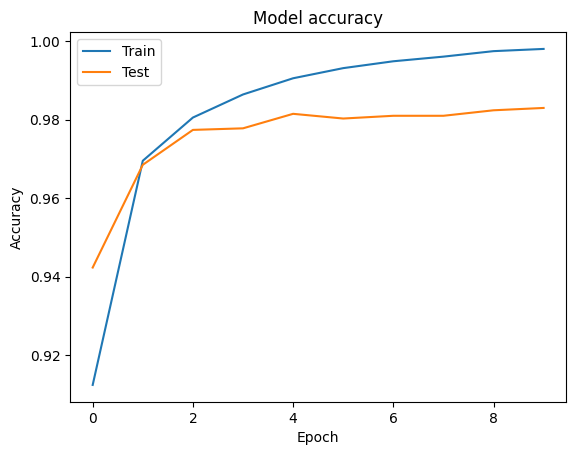

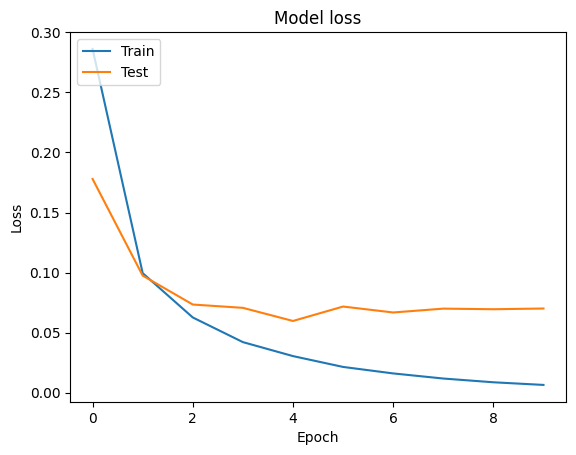

In [2]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

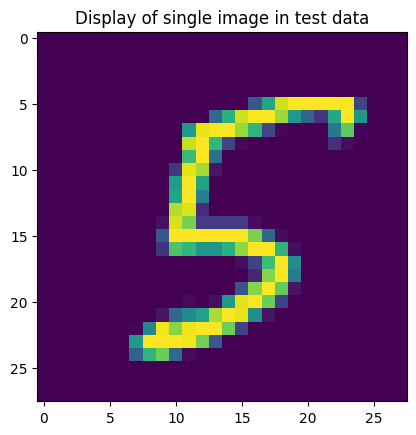

1/1 [==============================] - 0s 279ms/step

 The predicted single image in the test data is:  [[7.2057933e-20 1.5289277e-18 1.7039179e-19 1.3111820e-12 2.6332960e-20
  1.0000000e+00 4.2595759e-14 1.3802208e-21 3.5118304e-16 2.6254766e-13]]


In [3]:
# plot the single image in the test data
plt.imshow(test_images[23].reshape(28,28))
plt.title('Display of single image in test data')
plt.show()

# get the prediction of the model on the above image in the test data
test_img_pred = model.predict(test_data[[23], :])
print("\n The predicted single image in the test data is: ", test_img_pred)

Change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [4]:
model_1 = Sequential()
model_1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model_1.add(Dense(550, activation='tanh'))
model_1.add(Dense(600, activation='tanh'))
model_1.add(Dense(612, activation='tanh'))
model_1.add(Dense(10, activation='sigmoid'))

model_1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

Epoch 1/15
235/235 [==============================] - 16s 65ms/step - loss: 0.4837 - accuracy: 0.8567 - val_loss: 0.4628 - val_accuracy: 0.8406
Epoch 2/15
235/235 [==============================] - 21s 89ms/step - loss: 0.1628 - accuracy: 0.9502 - val_loss: 0.2227 - val_accuracy: 0.9258
Epoch 3/15
235/235 [==============================] - 17s 72ms/step - loss: 0.1036 - accuracy: 0.9675 - val_loss: 0.2265 - val_accuracy: 0.9348
Epoch 4/15
235/235 [==============================] - 15s 64ms/step - loss: 0.0731 - accuracy: 0.9771 - val_loss: 0.1236 - val_accuracy: 0.9605
Epoch 5/15
235/235 [==============================] - 15s 64ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0939 - val_accuracy: 0.9723
Epoch 6/15
235/235 [==============================] - 14s 60ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 7/15
235/235 [==============================] - 14s 61ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0884 - val_accuracy:

Run the same code without scaling the images and check the performance

In [5]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model_2 = Sequential()
model_2.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss_1, test_acc_1] = model_2.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss_1, test_acc_1))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 6.7784 - accuracy: 0.8712 - val_loss: 0.8386 - val_accuracy: 0.9192
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.4121 - accuracy: 0.9461 - val_loss: 0.4915 - val_accuracy: 0.9264
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2281 - accuracy: 0.9592 - val_loss: 0.2605 - val_accuracy: 0.9504
Epoch 4/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1774 - accuracy: 0.9672 - val_loss: 0.4065 - val_accuracy: 0.9317
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.1507 - accuracy: 0.9729 - val_loss: 0.6583 - val_accuracy: 0.9201
Epoch 6/10
235/235 [==============================] - 8s 36ms/step - loss: 0.1321 - accuracy: 0.9757 - val_loss: 0.2772 - val_accuracy: 0.9647
Epoch 7/10
235/235 [==============================] - 7s 32ms/step - loss: 0.1312 - accuracy: 0.9785 - val_loss: 0.3019 - val_acc